In [32]:
import pandas as pd
import numpy as np 
import plotly.express as px 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
# supprimer colonne Time signature
# supprimer les lignes où le genre est soundtrack & movie
# modifier genre enfant.

# regarder heatmap de toutes les chansons
# regarder heatmap sur les chansons les plus populaires (pop > 80)
# regarder corrélation avec popularity

# quels sont les genres qui reviennent le plus dans le top populaires?
# quels sont les artistes qui reviennent ? groupe ? femme / homme ? 

# faire des regplot par features pour voir si c'est corrélé
# faire un polar plot 


In [4]:
df.drop('time_signature', axis = 1, inplace = True)

# 1. Genres

In [5]:
df['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [6]:
df = df[(df['genre'] != 'Soundtrack') & (df['genre'] != 'Movie') ]
df.shape

(215273, 17)

In [7]:
df['genre'].replace("Children's Music", "Children’s Music", inplace = True)

In [25]:
df['duration_ms'] = round(df['duration_ms']/1000,2)
df.rename(columns={'duration_ms':'duration_sec'},inplace=True)


In [27]:
popularity_genre = round(df.groupby(by=['genre']).mean('popularity'),2).sort_values(['popularity'], ascending=False).reset_index()

popularity_genre

,genre,popularity,acousticness,danceability,duration_sec,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Pop,66.59,0.22,0.64,220.86,0.64,0.02,0.18,-6.50,0.11,121.18,0.48
1,Rap,60.53,0.17,0.70,219.85,0.65,0.01,0.20,-6.67,0.19,121.10,0.46
2,Rock,59.62,0.20,0.54,237.00,0.68,0.05,0.19,-7.29,0.05,122.63,0.52
3,Hip-Hop,58.42,0.18,0.72,219.98,0.64,0.01,0.20,-6.86,0.21,120.79,0.47
4,Dance,57.28,0.15,0.64,226.26,0.70,0.04,0.19,-6.05,0.08,120.80,0.52
5,Indie,54.70,0.33,0.57,224.15,0.58,0.09,0.17,-7.92,0.07,119.29,0.43
6,R&B,52.31,0.29,0.64,225.75,0.56,0.03,0.18,-7.60,0.12,116.37,0.45
7,Alternative,50.21,0.16,0.54,233.24,0.71,0.06,0.20,-6.54,0.09,122.53,0.45
8,Folk,49.94,0.46,0.53,235.81,0.49,0.08,0.17,-9.87,0.05,118.75,0.44
9,Soul,47.03,0.36,0.62,234.71,0.53,0.06,0.18,-8.87,0.08,115.32,0.48


In [29]:
popularity_genre.to_csv('..\data\pop_genre.csv.zip', compression='zip')

In [8]:
df['genre'].value_counts()

Children’s Music    14756
Comedy               9681
Indie                9543
Jazz                 9441
Pop                  9386
Electronic           9377
Folk                 9299
Hip-Hop              9295
Rock                 9272
Alternative          9263
Classical            9256
Rap                  9232
World                9096
Soul                 9089
Blues                9023
R&B                  8992
Anime                8936
Reggaeton            8927
Ska                  8874
Reggae               8771
Dance                8701
Country              8664
Opera                8280
A Capella             119
Name: genre, dtype: int64

# Top musics

In [9]:
top_songs = df[df['popularity'] > 80]

In [10]:
# corrélation 
cols = df.select_dtypes(include='number').columns
df_corr = df.corr()
fig = px.imshow(df.corr())
fig.show()

In [11]:
pop_corr = df_corr[['popularity']].sort_values(by='popularity', ascending = False)
pop_corr

,popularity
popularity,1.000000
loudness,0.361821
danceability,0.249355
energy,0.211830
tempo,0.075693
valence,0.044637
duration_ms,-0.017508
speechiness,-0.174084
liveness,-0.186511
instrumentalness,-0.217242


In [12]:
def get_plot(col):
    plt.figure()
    sns.regplot(x=df[col], y=df['popularity'])
    plt.show()

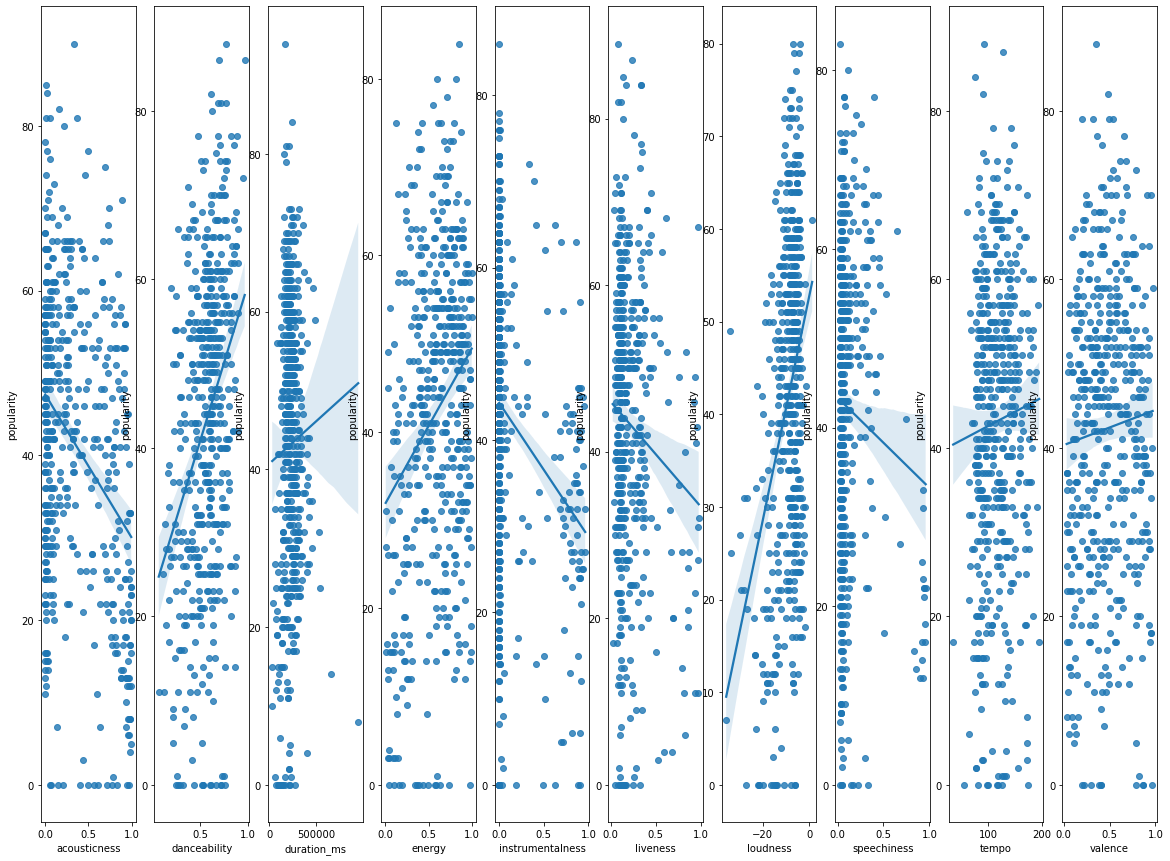

In [13]:
plt.figure(figsize=(20,15))
for i in enumerate(cols[1:]):
    
    plt.subplot(1,10,i[0]+1)
    sns.regplot(data = df.sample(500), y='popularity', x = i[1])
plt.show()

In [14]:
cols[1:]

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')

In [15]:
# polar plot 

#caractéristiques à avoir sur le plot: on ne garde que celles-ci parce qu'elles ont la même échelle
carac = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness',  'valence']

# moyenne de ces caractéristiques 

fig = px.line_polar(top_songs, theta=carac, r= top_songs[carac].mean(), line_close=True, template="plotly_dark", 
                    color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(fill='toself')
fig.update_layout(autosize = False)
fig.show()

In [16]:
top_pivot = top_songs.pivot_table(index=['track_id', 'track_name'], values = cols)
top_pivot = top_pivot.sort_values(by='popularity', ascending=False)


In [17]:
# ajustement avec les chansons du top 20
top_20 = top_pivot[top_pivot['popularity'] > 95].sort_values(by='popularity', ascending = False)[:20]
top_20

,,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
track_id,track_name,,,,,,,,,,,
14msK75pk3pA33pzPVNtBF,7 rings,0.5780,0.725,178640,0.321,0.000000,0.0884,-10.744,100.0,0.3230,70.142,0.319
4kV4N9D1iKVxx1KLvtTpjS,"break up with your girlfriend, i'm bored",0.0421,0.726,190440,0.554,0.000000,0.1060,-5.290,99.0,0.0917,169.999,0.335
6MWtB6iiXyIwun0YzU6DFP,Wow.,0.1630,0.833,149520,0.539,0.000002,0.1010,-7.399,99.0,0.1780,99.947,0.385
5w9c2J52mkdntKOmRLeM2m,Con Calma,0.1100,0.737,193227,0.860,0.000002,0.0574,-2.652,98.0,0.0593,93.989,0.656
3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,0.5560,0.760,158040,0.479,0.000000,0.0703,-5.574,97.0,0.0466,89.911,0.913
5iwz1NiezX7WWjnCgY5TH4,Calma - Remix,0.3230,0.826,238200,0.773,0.000000,0.1430,-4.218,97.0,0.0524,126.899,0.761
6Qs4SXO9dwPj5GKvVOv8Ki,Dancing With A Stranger (with Normani),0.4500,0.741,171030,0.520,0.000002,0.2220,-7.513,97.0,0.0656,102.998,0.347
2dpaYNEQHiRxtZbfNsse99,Happier,0.1910,0.687,214290,0.792,0.000000,0.1670,-2.749,97.0,0.0452,100.015,0.671
25sgk305KZfyuqVBQIahim,Sweet but Psycho,0.0691,0.719,187436,0.704,0.000000,0.1660,-4.724,97.0,0.0476,133.002,0.628


In [18]:
# polar plot 

#caractéristiques à avoir sur le plot: on ne garde que celles-ci parce qu'elles ont la même échelle
carac = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness',  'valence']

# moyenne de ces caractéristiques 

fig = px.line_polar(top_20, theta=carac, r= top_20[carac].mean(), line_close=True,
                    template="plotly_dark", color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(fill='toself')
fig.update_layout(autosize = False)
fig.show()

In [19]:
# top 10 
top_10 = top_20[:10]

fig = px.line_polar(top_10, theta=carac, r= top_10[carac].mean(), line_close=True, template="plotly_dark", 
                    color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(fill='toself')
fig.update_layout(autosize = False)
fig.show()

Les caractéristiques les plus importantes pour être un top : Danceability, energy & valence.

In [20]:
# regardons la distribution de loudness dans le top 
# chansons populaires
fig = px.histogram(top_songs, x='loudness', title = "Loudness distrib in the most popular songs")
fig.show()

In [21]:
# top 20
fig = px.histogram(top_20, x='loudness', title = "Loudness distrib in the top 20")
fig.show()

In [22]:
# top 10
fig = px.histogram(top_20, x='loudness', title = "Loudness distrib in the top 10")
fig.show()

en caractéristiques : loudness entre -4 et -6

danceability > 0.7

energy > 0.5 

instrumentalness < 0.1 

liveness < 0.2

speechiness < 0.2

valence > 0.4 

acousticness entre 0.2 et 0.3

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
top_songs['loudness_scaled'] = scaler.fit_transform(top_songs['loudness'].values.reshape(-1, 1))

C:\Users\Alex\AppData\Local\Temp/ipykernel_27436/675914640.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
# polar plot 

#caractéristiques à avoir sur le plot: on ne garde que celles-ci parce qu'elles ont la même échelle
carac = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness',  'valence', 'loudness_scaled']

# moyenne de ces caractéristiques 

fig = px.line_polar(top_songs, theta=carac, r= top_songs[carac].mean(), line_close=True, template="plotly_dark", 
                    color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(fill='toself')
fig.update_layout(autosize = False)
fig.show()

In [30]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_sec,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.0830,0.724,246.33,0.689,0.000000,D,0.3040,-5.922,Minor,0.1350,146.496,0.6930
136,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,63,0.3230,0.685,186.47,0.610,0.000000,C,0.1020,-5.221,Minor,0.0439,94.384,0.3230
137,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,62,0.0675,0.762,199.52,0.520,0.000004,F,0.1140,-5.237,Minor,0.0959,75.047,0.0862
138,R&B,Surfaces,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,61,0.3600,0.563,240.60,0.366,0.002430,B,0.0955,-6.896,Minor,0.1210,85.352,0.7680
139,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,68,0.5960,0.653,213.95,0.621,0.000000,B,0.0811,-5.721,Minor,0.0409,100.006,0.4660


In [31]:
popularity_genre

,genre,popularity,acousticness,danceability,duration_sec,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Pop,66.59,0.22,0.64,220.86,0.64,0.02,0.18,-6.50,0.11,121.18,0.48
1,Rap,60.53,0.17,0.70,219.85,0.65,0.01,0.20,-6.67,0.19,121.10,0.46
2,Rock,59.62,0.20,0.54,237.00,0.68,0.05,0.19,-7.29,0.05,122.63,0.52
3,Hip-Hop,58.42,0.18,0.72,219.98,0.64,0.01,0.20,-6.86,0.21,120.79,0.47
4,Dance,57.28,0.15,0.64,226.26,0.70,0.04,0.19,-6.05,0.08,120.80,0.52
5,Indie,54.70,0.33,0.57,224.15,0.58,0.09,0.17,-7.92,0.07,119.29,0.43
6,R&B,52.31,0.29,0.64,225.75,0.56,0.03,0.18,-7.60,0.12,116.37,0.45
7,Alternative,50.21,0.16,0.54,233.24,0.71,0.06,0.20,-6.54,0.09,122.53,0.45
8,Folk,49.94,0.46,0.53,235.81,0.49,0.08,0.17,-9.87,0.05,118.75,0.44
9,Soul,47.03,0.36,0.62,234.71,0.53,0.06,0.18,-8.87,0.08,115.32,0.48


In [70]:
fig = px.bar_polar(popularity_genre, r=popularity_genre['danceability'],
    theta = popularity_genre['genre'], template="plotly_dark", color= 'popularity', 
    color_continuous_scale=px.colors.diverging.Temps,
    title = "Danceability by genre")
fig.update_layout(width=1000, 
                      height=600, 
                      title= {'x' : 0.5})
fig.show()

In [64]:
# danceability des top genres
fig = go.Figure(go.Barpolar(
    r=popularity_genre['danceability'],
    theta = popularity_genre['genre']
))

fig.show()